# Actividad S15: Clasificación de acciones

Esta actividad tiene como objetivo general, aplicar los conceptos que has adquirido hasta el momento durante el curso de Aprendizaje Profundo, en particular para realizar la actividad necesitarás de tus conocimientos sobre:

* Pytorch.
* Perceptrón multicapa.
* Redes Neuronales Convolucionales.
* Redes Neuronales Recurrentes.
* Dataset, DataLoader, etc.


## Descripción del problema

Antes de iniciar con la actividad, veamos el tipo de datos que se tienen disponibles para entrenamiento, validación y pruebas. Para esto, te invito
a descarga el archivo [UFC-5.zip](https://drive.google.com/file/d/1tdnOmcZy-7wMp9K9kBLOQhFkLvRX1Zcg/view?usp=sharing) que contiene ejemplos de los datos.

Al descomprimir el archivo encontrarás videos que se encuentran organizados en las siguientes carpetas:

*   Archery
*   Basketball
*   Diving
*   PlayingCello
*   VolleyballSpiking

El nombre de cada carpeta corresponde a la acción que se realiza en los videos almacenados en ella. Por ejemplo, en la carpeta ´VolleyballSpiking´ se encuentra el siguiente video:


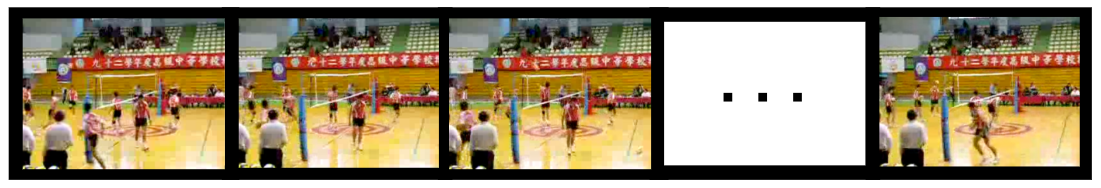



A partir de los datos que tenemos a nuestra disposición, nuestra tarea consiste en construir un modelo basado en **Redes Neuronales Convolucionales**, **Redes Neuronales Recurrentes** y el **Perceptrón multi-capa** que teniendo como dato de entrada una secuencia de imágenes (video) nos indique qué acción se esta realizando en el video.

## ¿Trabajar con video?

Un video esta compuesto por una secuencia de imágenes ( frames). A continuación, tienes a tus disposición algunas funciones de utilería que te muestran un ejemplo de cómo cargar un video a memoria (a partir de su path). Al cargar el video en memoria podrás observar cada una de las imágenes que constituyen la secuencia de frames en formato RGB.

In [ ]:
import cv2 as cv
import numpy as np

In [ ]:
# Las imágenes(frames) del video podrían ser rectangulares,
# Tomemos un recuadro del centro del frame
def crop_csquare(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]

In [ ]:
# Función que permite cargar a memoria un video
#Parámetros de entrada

## path:         ruta y nombre del archivo (video)
## max_frames:   indica cuantas imágenes(frames) queremos que retorne la función,
##               si max_frames=0, la función retorna todas las imágenes del video
## resize:       permite indicar el tamaño deseado de las imágenes que retorna la función

## Parámetro de salida:
## frames        lista de imágenes acorde a los parámetros 'max_frames' y 'resize'.

def load_video(path, max_frames=0, resize=(64, 64)):
    cap = cv.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_csquare(frame)
            frame = cv.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

Para ver algunos ejemplos sobre el manejo de archivos de video en Python, te invito a consultar el material de apoyo que se encuentra en la siguiente sección [Material de apoyo](https://canvas.iteso.mx/courses/38779/modules/items/1562481) del curso de Aprendizaje Profundo en CANVAS.

## Videos a secuencia de imágenes RGB

Verifiquemos el funcionamiento de nuestras funciones, cargando dos videos y verificando las dimensiones del tensor que genera. Pero primero, descomprimamos los datos que descargamos.

In [ ]:
#!unzip "/content/drive/MyDrive/DL2024p/S15/UFC-5.zip" -d "/content/drive/MyDrive/DL2024p/S15/temp/data"

In [ ]:
# Carguemos un video a manera de ejemplo

path1 = '/content/drive/MyDrive/DL2024p/S15/temp/data/UFC-5/Archery/v_Archery_g01_c01.avi'
frames=load_video(path1)

In [ ]:
# Veamos las características de la secuencia de frames(imágenes) que obtuvimos
# utilizando los valores por defecto en los parámetros max_frames y resize
print(frames.shape)

(131, 64, 64, 3)


In [ ]:
# Ahora definamos max_frames = 15 y resize=(32, 32)
# para observar el resultado generado por la función load_video

frames=load_video(path1, max_frames=15, resize=(32, 32))
print(frames.shape)

(15, 32, 32, 3)


Observemos que los parámetros **max_frames** y **resize** tienen relación directa con la longitud de las secuencias de imágenes (que en algún momento sería la entrada a una capa recurrente) y la dimensionalidad de cada elemento(imagen) en la secuencia.

##Desarrollo de la actividad

Dado el contexto previo, tu primer tarea consiste en implementar el siguiente modelo base.     (50 pts)

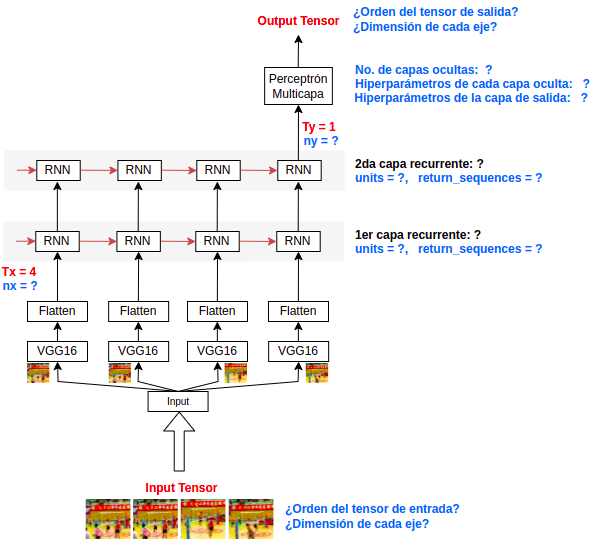

Antes de inciar con la implementación, contesta las preguntas planteadas y define el valor de los hiperparámetros de la red neuronal. Considera que las únicas restricciones de diseño en la arquitectura para este primer modelo son: **Tx = 4** (número de celdas en la primer capa recurrente) y **Ty=1** (en la segunda capa recurrente únicamente nos interesa la activación de la celda que se encuentra más a la derecha).

Antes de continuar, observa que en el diagrama anterior, **nx** denota la dimensionalidad del vector que representa un elemento de la secuencia de entrada y **ny** la dimensionalidad del vector de activación de la celda que se encuentra más a la derecha.

In [ ]:
# Escribe aquí la respuesta a cada pregunta planteada
# y justifica el valor que asignes a cada hiperparámetro
# de tu red neuronal.

#  1. ¿Orden del tensor de entrada?
# sequence length: S
# barch_size: M
# (S, M, C, W, H) -> 5
# or (M, S, C, W, H) for batch_first


#  2. ¿Dimensión de cada eje del tensor de entrada?
# sequence length: 4
# batch_size: 30
# C: 3
# W: 256
# H: 256

#  3. nx = a series of 10 frames

#  4. Parámetros de la 1er capa recurrente:
# input_size: output from each CNN
  # hidden_size: the same size as previous parameter
# num_layers: 4
# return sequence: embedding size. The same from input size

#  5. Parámetros de la 2da capa recurrente: in-> embedding size, out -> embedding size. Many to many

#  6. ny = number of classes


#  -----   Perceptrón multicapa   -----
#  7. No. capas ocultas: 4

#  8. Hiperparámetros de cada capa oculta
# linear layer with input as the embedding size from the last LSTM N.N.

#  9. Hiperparámetros de la capa de salida
# linear layer with number of classes

#  10. ¿Orden del tensor de salida?
# (M, nClasses)

#  11. ¿Dimensión de cada eje del tensor de salida?
# M: 300
# nClasses: 5

**Preparación de datos (entrenamiento, validación y pruebas)**

In [ ]:
# Implemente las funciones que requiera para cargar, transformar y generar
# los batchs de ejemplos de entrenamiento, validación y pruebas.



**Construcción de la red neuronal**

In [ ]:
# Para la implementación, tome como base la arquitectura descrita anteriormente
# en la figura (considere la red neuronal como un modelo base, que podrá modificar
# si es necesario para mejorar el desempeño de su modelo).




**Entrenamiento, Validación de la red neuronal**

Antes de iniciar con el entrenamiento, validación y pruebas de su red neuronal, se sugiere que valide el workflow y verifique que el tensor de salida en la red neuronal tiene las características esperadas.

In [ ]:
# Si utiliza modelos preentrenado, se sugiere congelar algunas capas.
# no olvide personalizar el modelo preentrenado acorde a las características de
# sus tensores.




**Almacenamiento y Pruebas de su mejor modelo**


In [ ]:
# Es momento de probar el desempeño de su mejor modelo con datos de prueba
# No olvide almacenar su modelo, se sugiere estar almacenando los pesos durante
# el ciclo de entrenamiento



## ¡Buena suerte!

Fecha de máxima de entrega: ***Lunes 06 de mayo, 19:00h***